In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

First let's prepare the data.

In [44]:
ds = pd.read_csv('iris.csv')

In [45]:
ds.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
# The rows corresponding to Setosa
setosa = ds[ds.species == 'setosa']

In [47]:
# The rows corresponding to Versicolor
versicolor = ds[ds.species == 'versicolor']

In [48]:
# The rows corresponding to Virginica
virginica = ds[ds.species == 'virginica']

Below we plot petal length versus sepal length for the three Iris species.

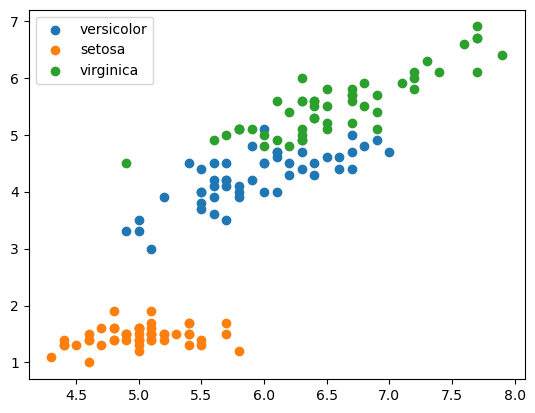

In [49]:
plt.scatter(versicolor['sepal_length'], versicolor['petal_length'], label='versicolor')
plt.scatter(setosa['sepal_length'], setosa['petal_length'], label='setosa')
plt.scatter(virginica['sepal_length'], virginica['petal_length'], label='virginica')
plt.legend()

Below we replace the class labels by $1,2,3$.

In [50]:
ds.replace('setosa', 1, inplace=True)

In [51]:
ds.replace('versicolor', 2, inplace=True)

In [52]:
ds.replace('virginica', 3, inplace=True)

In [53]:
# The input data
X = ds[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

In [54]:
# The class labels
Y = ds['species'].to_numpy()

In [55]:
def LDA(X, Y, k):
    """
        Construct the LDA classifier defined by explanatory variable X
        and response variable Y and return it.
        Returns: h, a Python function taking a row with length X.shape[0]
        and returning a class between 1 and k.
    """
    
    # The rows of X corresponding to the different class labels
    Xs = [X[Y == i] for i in list(range(1,k+1))]
    
    # Number of instances of each class
    ns = [len(x) for x in Xs]
    n = len(X)
    
    # Proportion of each class out of the total
    pis = [m / n for m in ns]
    
    # Mean input vector for each class
    mus = [x.mean(axis=0) for x in Xs]
    
    # The matrices appearing in the sum for S_i in LDA
    matrices = [np.array([(Xs[j] - mus[j])[i].reshape(-1,1) @ (Xs[j] - mus[j])[i].reshape(1,-1)
                          for i in range(ns[j])]) for j in range(k)]
    
    # The matrices S_i in LDA
    Sigmas = [mat.mean(axis=0) for mat in matrices]
    
    # The matrix S in LDA
    Sigma = sum(m * S for (m, S) in zip(ns, Sigmas)) / n
    
    # The classification functions delta in LDA
    deltas = [lambda x, j=j: x @ inv(Sigma) @ mus[j].T - 0.5 * mus[j] @ inv(Sigma) @ mus[j].T + np.log(pis[j])
             for j in range(k)]

    # The LDA classifier
    h = lambda x: np.argmax([delta(x) for delta in deltas]) + 1
    
    return h

Below we train an LDA classifier and study its errors.

In [56]:
# The LDA classifier for X and Y
h = LDA(X, Y, 3)

In [57]:
# The predicted classes using LDA
Y_pred = list(map(h, X))

In [58]:
# The training error of the LDA classifier
train_error = (Y != Y_pred).mean()

In [59]:
print(f'Observed training error: {train_error:.3f}')

Observed training error: 0.020


Since LDA is a linear classifier, we can use Theorem 22.26 to compute a $1-\alpha$ confidence interval. To do this we need to calculate $\epsilon_n$.

In [60]:
n = len(Y)

In [61]:
d = X.shape[1]

In [62]:
alpha = 0.05

In [63]:
eps = np.sqrt((32 / n) * np.log((8 * (n**(d+1) + 1)) / alpha))

In [64]:
print(f'95% confidence interval for true error rate: ({(train_error - eps):.4f}, {(train_error + eps):.4f})')

95% confidence interval for true error rate: (-2.5152, 2.5552)
